<h1>Megan Yuly D195 Capstone Project - Quality of Sleep</h1>

<h2>Introduction</h2>

> For my capstone project I am analyzing data on quality of sleep. It is comprised of individuals' rating of their sleep along with lifestyle factors including stress level, physical activity, BMI, blood pressure, and duration of sleep. In this notebook I will be cleaning and analyzing my data. 

<h2>Data Wrangling</h2>

> In this section I will do a brief analysis to see what I need to clean. 

In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import csv
%matplotlib inline
import matplotlib.pyplot as plt

> loading the csv file and printing out the first 5 rows.

In [118]:
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [120]:
df.tail()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [124]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [126]:
df.isna().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

> This dataset is pretty clean so now I am going to start analyzing the data. 

<h2> Affects of Sleep Duration on Quality of Sleep </h2>

> First I am going to analyze sleep duration and it's relationship with the quality of sleep rating.

In [128]:
sleep_duration = (df['Sleep Duration'].value_counts())

Text(0, 0.5, 'Frequency of Occurance')

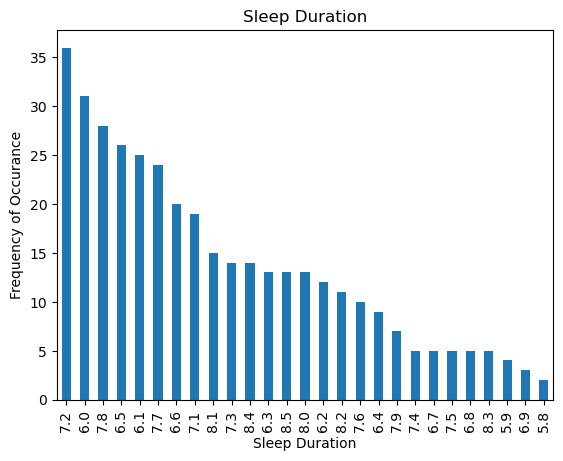

In [130]:
sleep_duration.plot(kind='bar', title = "Sleep Duration")
plt.xlabel('Sleep Duration')
plt.ylabel('Frequency of Occurance')

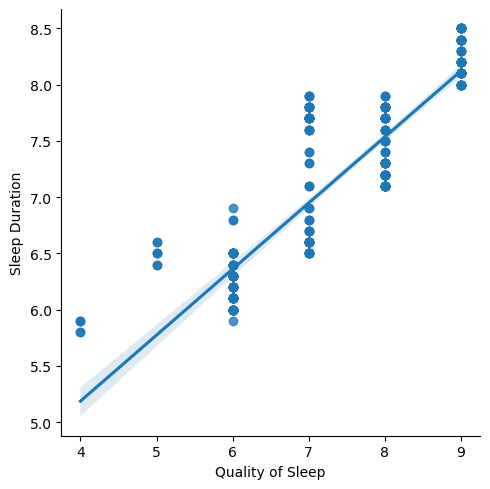

In [132]:
sns.lmplot(x='Quality of Sleep',y='Sleep Duration',data=df,fit_reg=True)

> It appears there is some sort of linear relationship between these two variables but it is not very strong.

<h2> Affects of Stress on Quality of Sleep </h2>

> Now let's analyze the affects of stress on sleep.

In [134]:
stress = (df['Stress Level'].value_counts())

Text(0, 0.5, 'Frequency of Occurance')

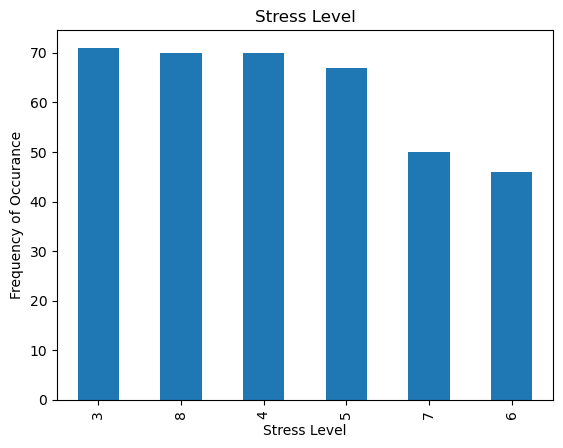

In [136]:
stress.plot(kind='bar', title = "Stress Level")
plt.xlabel('Stress Level')
plt.ylabel('Frequency of Occurance')

> Most people rated their stress level a 3 out of 10 which is pretty low. 

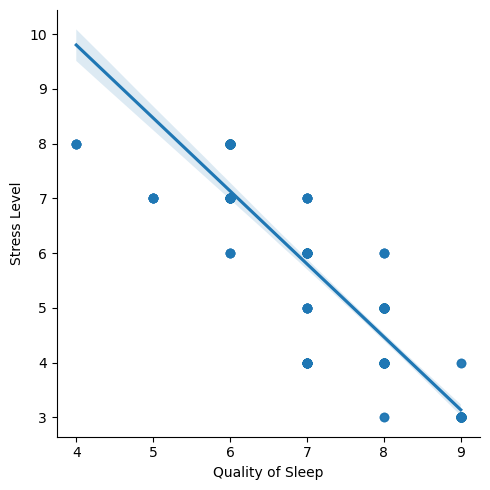

In [138]:
sns.lmplot(x='Quality of Sleep',y='Stress Level',data=df,fit_reg=True)

> There seems to be more of a negative linear relationship here between stress level and quality of sleep.

<h2> Affects of Physical Activity on Quality of Sleep </h2>

> Now lets analyze the impact of physical activity has on quality of sleep

In [140]:
physical_activity = (df['Physical Activity Level'].value_counts())

Text(0, 0.5, 'Frequency of Occurance')

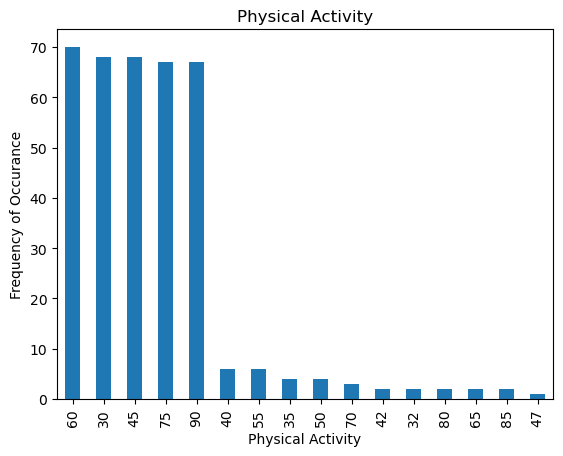

In [142]:
physical_activity.plot(kind='bar', title = "Physical Activity")
plt.xlabel('Physical Activity')
plt.ylabel('Frequency of Occurance')

> Most individuals in this survey reported physical activity of 60 minutes a day followed by 30 minutes a day. 

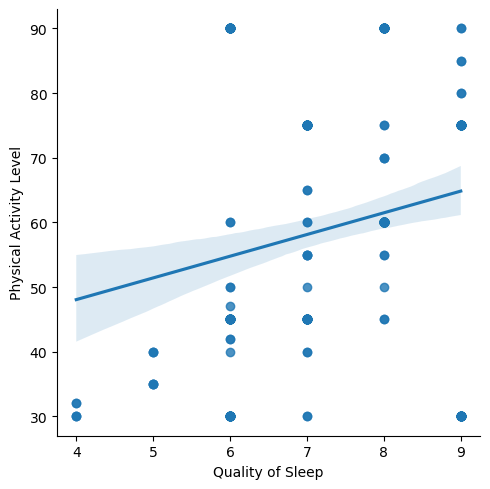

In [144]:
sns.lmplot(x='Quality of Sleep',y='Physical Activity Level',data=df,fit_reg=True)

> It looks like those who reported high levels of physical activity also reported higher quality of sleep ratings. It does not appear to be any kind of linear relationship between the variables.

<h2>Testing my hypothesis with Confidence Intervals</h2>

>In this section I am going to create a sample of my sleep data and test my hypothesis.

In [146]:
sample_data = df.sample(200)

In [148]:
duration_means, stress_means, sleep_means, diffs  = [], [], [], []

for _ in range(10000):
    bootsamp = sample_data.sample(200, replace = True)
    duration_mean = bootsamp[bootsamp['Physical Activity Level'] >= 30]['Quality of Sleep'].mean()
    stress_mean = bootsamp[bootsamp['Stress Level'] <= 3]['Quality of Sleep'].mean()
    sleep_mean = bootsamp[bootsamp['Sleep Duration'] >= 7]['Quality of Sleep'].mean()
    # append the info 
    duration_means.append(duration_mean)
    stress_means.append(stress_mean)
    sleep_means.append(sleep_mean)

In [149]:
np.std(duration_means)

0.08856012674872366

In [152]:
np.std(stress_means)

0.02399041559512218

In [154]:
np.std(sleep_means)

0.06917690819776247

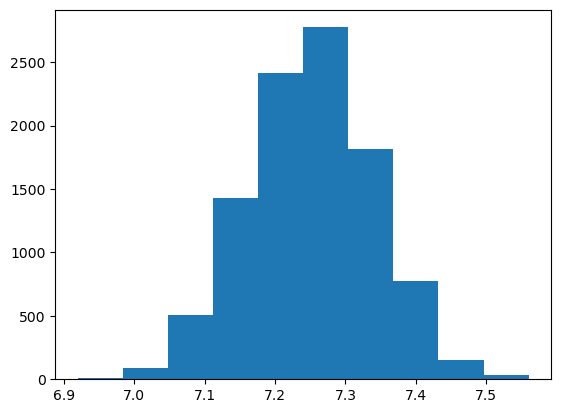

In [156]:
plt.hist(duration_means);

In [158]:
np.percentile(duration_means, 2.5), np.percentile(duration_means, 97.5)

(7.08, 7.425)

In [160]:
df[df['Physical Activity Level'] >= 30]['Quality of Sleep'].mean()

7.31283422459893

>I am confident that the quality of sleep rating for those who exercised for 30 minutes or more per day is somewhere between 7.17 and 7.49 This is very close to the actual mean from the sample I used for the confidence interval. This supports my hypothesis that physical activity results in higher quality of sleep.

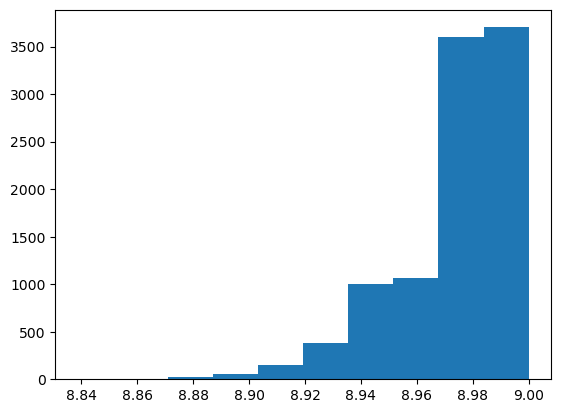

In [162]:
plt.hist(stress_means);

In [164]:
np.percentile(stress_means, 2.5), np.percentile(stress_means, 97.5)

(8.92, 9.0)

In [166]:
df[df['Stress Level'] <= 3]['Quality of Sleep'].mean()

8.971830985915492

>My confidence interval from my sample matched up well with the mean of the survey data. I am confident that the participates who rate their stress level at a 3 or lower rate their quality of sleep pretty high. This supports that those with lower stress also report better quality sleep.

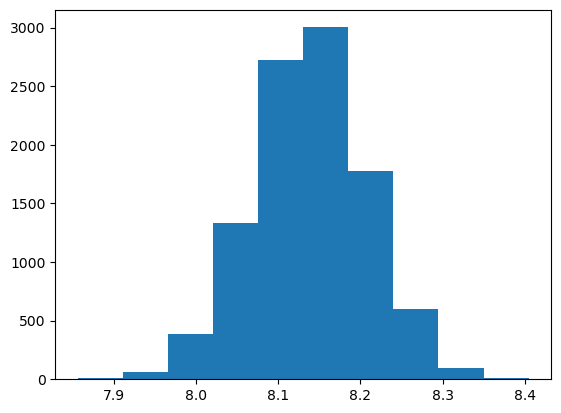

In [168]:
plt.hist(sleep_means);

In [170]:
np.percentile(sleep_means, 2.5), np.percentile(sleep_means, 97.5)

(8.0, 8.274336283185841)

In [172]:
df[df['Sleep Duration'] >= 7]['Quality of Sleep'].mean()

8.146118721461187

>With 95% confidence it looks like having a sleep duration of 7 hours or more results in a quality of sleep rating of 8. This supports my hypothesis that sleeping for the recommended 7-8 hours results in survey particpants rating their sleep at an 8 which is a very good score.